## Importing Directories

In [1]:
import os
import random
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.image import load_img

import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, array_to_img
from tensorflow.keras.applications import EfficientNetB1

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense,Conv2D,Dropout,GlobalAveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import imutils    
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Creating Directories to store Cropped Images

In [2]:
#Creating Directory for Training Data
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Crop-Brain-MRI")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Crop-Brain-MRI//glioma_tumor")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Crop-Brain-MRI//meningioma_tumor")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Crop-Brain-MRI//pituitary_tumor")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Crop-Brain-MRI//no_tumor")

In [3]:
# Creating Directory for Testing Data
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Test-Data")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Test-Data//glioma_tumor")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Test-Data//meningioma_tumor")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Test-Data//pituitary_tumor")
os.mkdir("C://Users//Avik//Desktop//Projects//BrainTumorDataset//Test-Data//no_tumor")

## Data Visualization

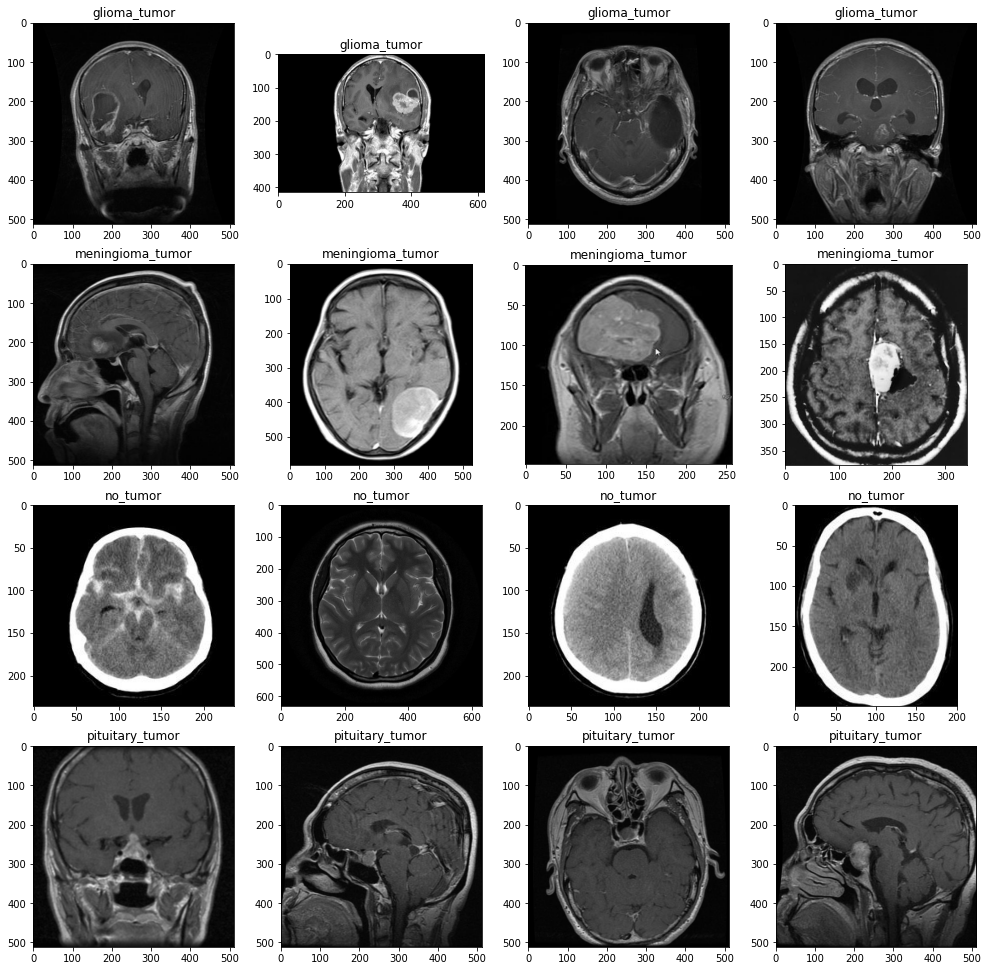

In [4]:
train_dir = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Training\\"
test_dir="C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Testing\\"

classes=os.listdir("C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Training")
files_path_dict={}

for c in classes:
  files_path_dict[c]=list(map(lambda x :train_dir+c+'//'+x,os.listdir(train_dir+c)))

plt.figure(figsize=(17,17))
index = 0

for c in classes:
  random.shuffle(files_path_dict[c])
  path_list = files_path_dict[c][:5]

  for i in range(1,5):
    index+=1
    plt.subplot(4,4,index)
    plt.imshow(load_img(path_list[i]))
    plt.title(c)

## Creating a Function to Crop Images

In [5]:
 def crop_image(image, plot=False):
    
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)
    
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
    img_thresh = cv2.erode(img_thresh, None, iterations=2)
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    contours = cv2.findContours(img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()
    
    return new_image


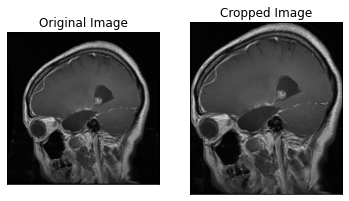

In [6]:
example_img = cv2.imread("C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Training\\glioma_tumor\\gg (101).jpg")
copped_image=crop_image(example_img,plot=True)

## Saving The Cropped Images 

In [7]:
# Cropping the Training Images and Saving it to the Directory we previously cretaed
glioma = train_dir + "glioma_tumor"
meningioma = train_dir + "meningioma_tumor"
no_tumor = train_dir + "no_tumor"
pituitary = train_dir + "pituitary_tumor"

j = 0
for i in tqdm(os.listdir(glioma)):
  path = os.path.join(glioma, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Crop-Brain-MRI\\glioma_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j = 0
for i in tqdm(os.listdir(meningioma)):
  path = os.path.join(meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Crop-Brain-MRI\\meningioma_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j = 0
for i in tqdm(os.listdir(no_tumor)):
  path = os.path.join(no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Crop-Brain-MRI\\no_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1
  
j = 0
for i in tqdm(os.listdir(pituitary)):
  path = os.path.join(pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Crop-Brain-MRI\\pituitary_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1
    
    
    

100%|████████████████████████████████████████████████████████████████████████████████| 901/901 [00:10<00:00, 89.24it/s]


In [8]:
# Cropping the Testing Images and Saving it to the Directory we previously cretaed
test_glioma = test_dir + "glioma_tumor"
test_meningioma = test_dir + "meningioma_tumor"
test_no_tumor = test_dir + "no_tumor"
test_pituitary = test_dir + "pituitary_tumor"


j = 0
for i in tqdm(os.listdir(test_glioma)):
  path = os.path.join(test_glioma, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\glioma_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1

j = 0
for i in tqdm(os.listdir(test_meningioma)):
  path = os.path.join(test_meningioma, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\meningioma_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1
  
j = 0
for i in tqdm(os.listdir(test_no_tumor)):
  path = os.path.join(test_no_tumor, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\no_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1
  
j = 0
for i in tqdm(os.listdir(test_pituitary)):
  path = os.path.join(test_pituitary, i)
  img = cv2.imread(path)
  img = crop_image(img,plot=False)
  if img is not None:
    img = cv2.resize(img,(224,224))
    save_path = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\pituitary_tumor\\" + str(j) + ".jpg"
    cv2.imwrite(save_path,img)
    j=j+1
  

    
    

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 82.19it/s]


## Performing Data Augmentation and Preparing the Train, Validation and Test Dataset

In [9]:
# Use Image Data Generator to perform this task.
datagen = ImageDataGenerator(rotation_range=10, height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)
train_data = datagen.flow_from_directory('C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Crop-Brain-MRI\\',target_size=(224,224), batch_size=32, class_mode = 'categorical', subset = 'training')
valid_data = datagen.flow_from_directory('C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Crop-Brain-MRI\\',target_size=(224,224), batch_size=32, class_mode = 'categorical', subset = 'validation')

test_datagen = ImageDataGenerator()

test_data = datagen.flow_from_directory("C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\",target_size=(224,224), class_mode = 'categorical')

Found 2613 images belonging to 4 classes.
Found 652 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [10]:
# Viewing the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


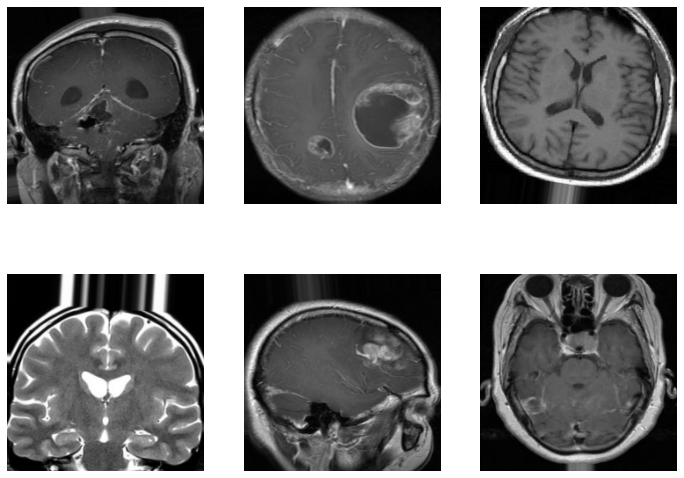

In [11]:
# Viewing the augmented data.
sample_x,sample_y=next(train_data)
plt.figure(figsize=(12,9))
for i in range(6):
  plt.subplot(2,3,i+1)
  sample = array_to_img(sample_x[i])
  plt.axis('off')
  plt.grid(False)
  plt.imshow(sample)
plt.show()

## Building and Compiling the Model 

In [12]:
effnet = EfficientNetB1(weights = "imagenet", include_top=False, input_shape=(224,224,3))
model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation = "softmax")(model)
model = Model(inputs=effnet.input,outputs=model)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

## Model Training and Model Evaluation

In [13]:
model.compile(optimizer=Adam(lr=0.0001),loss="categorical_crossentropy",metrics=["accuracy"])
checkpoint=ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

C:\Anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [14]:
story=model.fit(train_data,epochs=7,validation_data=valid_data,verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/7
82/82 [==============================] - ETA: 31:29 - loss: 1.5331 - accuracy: 0.250 - ETA: 11:49 - loss: 1.4502 - accuracy: 0.265 - ETA: 11:31 - loss: 1.4357 - accuracy: 0.291 - ETA: 11:13 - loss: 1.4294 - accuracy: 0.296 - ETA: 11:01 - loss: 1.4293 - accuracy: 0.281 - ETA: 10:46 - loss: 1.4376 - accuracy: 0.260 - ETA: 10:35 - loss: 1.4204 - accuracy: 0.272 - ETA: 10:24 - loss: 1.4238 - accuracy: 0.281 - ETA: 10:14 - loss: 1.4165 - accuracy: 0.288 - ETA: 10:08 - loss: 1.3970 - accuracy: 0.300 - ETA: 9:59 - loss: 1.3824 - accuracy: 0.306 - ETA: 9:50 - loss: 1.3675 - accuracy: 0.32 - ETA: 9:41 - loss: 1.3544 - accuracy: 0.33 - ETA: 9:32 - loss: 1.3456 - accuracy: 0.34 - ETA: 9:25 - loss: 1.3280 - accuracy: 0.36 - ETA: 9:17 - loss: 1.3180 - accuracy: 0.36 - ETA: 9:11 - loss: 1.3124 - accuracy: 0.36 - ETA: 9:05 - loss: 1.2953 - accuracy: 0.37 - ETA: 9:00 - loss: 1.2808 - accuracy: 0.38 - ETA: 8:54 - loss: 1.2666 - accuracy: 0.39 - ETA: 8:47 - loss: 1.2597 - accuracy: 0.39 - ETA:

C:\Anaconda\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/7
82/82 [==============================] - ETA: 13:31 - loss: 0.3286 - accuracy: 0.937 - ETA: 13:11 - loss: 0.4343 - accuracy: 0.890 - ETA: 12:55 - loss: 0.4728 - accuracy: 0.864 - ETA: 12:35 - loss: 0.4359 - accuracy: 0.875 - ETA: 12:15 - loss: 0.4231 - accuracy: 0.875 - ETA: 11:57 - loss: 0.4237 - accuracy: 0.880 - ETA: 11:45 - loss: 0.4558 - accuracy: 0.857 - ETA: 11:37 - loss: 0.4479 - accuracy: 0.863 - ETA: 11:33 - loss: 0.4503 - accuracy: 0.861 - ETA: 11:25 - loss: 0.4544 - accuracy: 0.853 - ETA: 11:16 - loss: 0.4620 - accuracy: 0.849 - ETA: 11:06 - loss: 0.4515 - accuracy: 0.854 - ETA: 10:54 - loss: 0.4622 - accuracy: 0.846 - ETA: 10:42 - loss: 0.4603 - accuracy: 0.848 - ETA: 10:31 - loss: 0.4646 - accuracy: 0.845 - ETA: 10:23 - loss: 0.4537 - accuracy: 0.851 - ETA: 10:14 - loss: 0.4492 - accuracy: 0.851 - ETA: 10:05 - loss: 0.4471 - accuracy: 0.845 - ETA: 9:57 - loss: 0.4383 - accuracy: 0.850 - ETA: 9:48 - loss: 0.4450 - accuracy: 0.84 - ETA: 9:38 - loss: 0.4464 - accur

In [15]:
model.evaluate(test_data)

1/1 [==============================] - ETA: 0s - loss: 0.1585 - accuracy: 0.95 - 1s 1s/step - loss: 0.1585 - accuracy: 0.9500


[0.15849700570106506, 0.949999988079071]

In [16]:
actual=[]
predicted=[]
test_glioma = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\glioma_tumor"
test_meningioma = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\meningioma_tumor"
test_no_tumor = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\no_tumor"
test_pituitary = "C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\pituitary_tumor"


for i in tqdm(os.listdir(test_glioma)):
  path = os.path.join(test_glioma, i)
  test_img1=cv2.imread(path)
  test_img1=np.expand_dims(test_img1,axis=0)
  pred=model.predict(test_img1)
  pred=np.argmax(pred)
  actual.append(0)
  predicted.append(pred)

for i in tqdm(os.listdir(test_meningioma)):
  path = os.path.join(test_meningioma, i)
  test_img1=cv2.imread(path)
  test_img1=np.expand_dims(test_img1,axis=0)
  pred=model.predict(test_img1)
  pred=np.argmax(pred)
  actual.append(1)
  predicted.append(pred)

for i in tqdm(os.listdir(test_no_tumor)):
  path = os.path.join(test_no_tumor, i)
  test_img1=cv2.imread(path)
  test_img1=np.expand_dims(test_img1,axis=0)
  pred=model.predict(test_img1)
  pred=np.argmax(pred)
  actual.append(2)
  predicted.append(pred)

for i in tqdm(os.listdir(test_pituitary)):
  path = os.path.join(test_pituitary, i)
  test_img1=cv2.imread(path)
  test_img1=np.expand_dims(test_img1,axis=0)
  pred=model.predict(test_img1)
  pred=np.argmax(pred)
  actual.append(3)
  predicted.append(pred)    

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.22it/s]


## Checking accuracy

In [17]:
confusion_matrix(actual, predicted)

array([[4, 1, 0, 0],
       [0, 5, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 5]], dtype=int64)

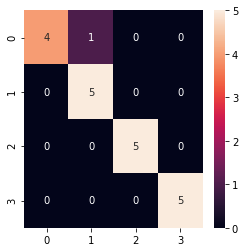

In [18]:
cf_train_matrix = confusion_matrix(actual, predicted)
plt.figure(figsize=(4,4))
sns.heatmap(cf_train_matrix, annot=True, fmt='d')

In [19]:
accuracy_score(actual, predicted)

0.95

## Obtaining Predictions on Test Image

glioma_tumor


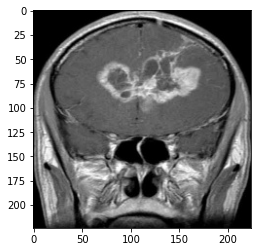

In [20]:
class_dict={0:"glioma_tumor",1:"meningioma_tumor",2:"no_tumor",3:"pituitary_tumor"}
test_img1=cv2.imread("C:\\Users\\Avik\\Desktop\\Projects\\BrainTumorDataset\\Test-Data\\glioma_tumor\\0.jpg")
plt.imshow(test_img1)
plt.grid(False)
test_img1=np.expand_dims(test_img1,axis=0)
pred=model.predict(test_img1)
pred=np.argmax(pred)
pred_class=class_dict[pred]
print(pred_class)